# COMPARE HSP2 TO HSPF USING CALLEG

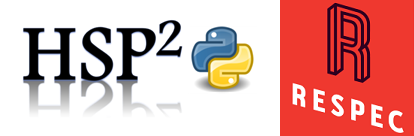

Copyright 2020 for this Jupyter Notebook and YouTube Video by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2020 by RESPEC INC. and released under the *GNU AFFERO GENERAL PUBLIC LICENSE*

This Notebook will compare the results of running HSPF and HSP$^2$ for the basic hydrology (PWATER, PWATER, and HYDR) to confirm the proper calculations of HSP$^2$

Calleg is a real watershed and has
+ 27 PERLND segments,
+ 129 PERLND segments,
+ 119 RCHRES segments,
+ 9 years of simulation time with hourly time steps (78,888 timesteps) from 1993-10-01 to 2002-10-01

This Notebook assumes HSPF has been run and the HBN data saved to an HDF5 file in the **HSPF RUN** directory.

## Required Python imports  and setup

In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt

# Set display options for convenience, does't change the data
pd.options.display.max_rows = 150
pd.options.display.max_columns = 20
pd.options.display.float_format = (
    "{:.4f}".format
)  # display 4 digits after the decimal point

%matplotlib inline

from hsp2.hsp2 import main, versions
from hsp2.hsp2tools import readUCI, readWDM

versions(["matplotlib"])

,version
name,
Python,"3.10.14 | packaged by conda-forge | (main, Mar..."
HSP2,n/a
numpy,1.26.4
numba,0.59.1
pandas,1.5.3
matplotlib,3.8.4
os,Linux-5.15.0-91-generic-x86_64-with-glibc2.35
processor,x86_64
Date/Time,2024-05-21T13:32:52.883623


Convenient name strings to get to the data

In [2]:
wdmname = "TEST.WDM"
uciname = "TEST09.UCI"
HBN = "hspf.h5"
hdfname = "hsp2.h5"

## Run HSP2 on the calleg

### Create HDF5 file

In [3]:
if os.path.exists(hdfname):
    os.remove(hdfname)
readUCI(uciname, hdfname)
readWDM(wdmname, hdfname)

39 reading from wdm
41 reading from wdm
42 reading from wdm
46 reading from wdm
113 reading from wdm
119 reading from wdm
121 reading from wdm
122 reading from wdm
123 reading from wdm
124 reading from wdm
125 reading from wdm
126 reading from wdm
127 reading from wdm
131 reading from wdm
132 reading from wdm
134 reading from wdm
135 reading from wdm
136 reading from wdm
140 reading from wdm


,Start,Stop,Freq,Length,TSTYPE,TFILL,STAID,STNAM,SCENARIO,LOCATION
TS039,1976-01-01 00:00:00,1977-01-01 00:00:00,1h,8784,PREC,-999.0000,HOURLY PREC,PRECIP TRAER IOWA,TEST02,C:1
TS041,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,EVAP,-999.0000,DAILY EVAP,FARMERS COOP WEATHER STN,TEST01,M:1
TS042,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,WIND,-999.0000,DAILY WIND,FARMERS COOP WEATHER STN,TEST01,M:1
TS046,1976-01-01 00:00:00,1977-01-01 00:00:00,2h,4392,SOLR,-999.0000,2 HOUR RAD,FARMERS WEATHER STN,TEST02,C:1
TS113,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0000,DAILY FLOW,IOWA RIVER MARSHALLTOWN,TEST01,M:1
TS119,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0000,DAILY FLOW,IOWA RIVER MARENGO,TEST01,M:1
TS121,1976-01-01 00:00:00,1977-01-01 00:00:00,2h,4392,ATMP,-999.0000,2 HOUR AIR TEMP,CEDAR RAPIDS IOWA,TEST02,C:1
TS122,1976-01-01 00:00:00,1977-01-01 00:00:00,2h,4392,ATMP,-999.0000,2 HOUR AIR TEMP,IOWA FALLS IOWA,TEST02,C:1
TS123,1976-01-01 00:00:00,1977-01-01 00:00:00,2h,4392,ATMP,-999.0000,2 HOUR AIR TEMP,MARSHALLTOWN IOWA,TEST02,C:1
TS124,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,DEWP,-999.0000,DAILY DEW PT,CEDAR RAPIDS IOWA,TEST01,M:1


### Run

Using profiler

Normal run

In [4]:
main(hdfname, saveall=True)

2024-05-21 13:33:00.84   Processing started for file hsp2.h5; saveall=True
STATE initializing contexts.
Looking for custom om loader in python code  hsp2.py
Looking for custom om json  hsp2.json
Loaded objects & paths: insures all paths are valid, connects models as inputs
Tokenizing models
Operational model status: enabled
op_tokens has 94 elements, with  1 executable elements
2024-05-21 13:33:03.84   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2024-05-21 13:33:03.84      PERLND P001 DELT(minutes): 60
2024-05-21 13:33:04.19         SNOW
2024-05-21 13:33:04.83         PWATER
2024-05-21 13:33:05.41      RCHRES R001 DELT(minutes): 60
2024-05-21 13:33:05.42         HYDR
2024-05-21 13:33:12.48      RCHRES R002 DELT(minutes): 60
2024-05-21 13:33:12.48         HYDR
2024-05-21 13:33:16.24      RCHRES R003 DELT(minutes): 60
2024-05-21 13:33:16.24         HYDR
2024-05-21 13:33:16.34      RCHRES R004 DELT(minutes): 60
2024-05-21 13:33:16.34         HYDR
2024-05-21 13:33:16.4

## Read Summary from HBN file

Find the higest frequency data available.

In [5]:
summary = pd.read_hdf(HBN, "SUMMARY")
summary.Frequency.unique()

array(['Monthly', 'Yearly'], dtype=object)

So the best available is monthly data.

## Automate checking by output flow

In [6]:
def hsp2key(hspfkey):
    op, activity, segment, _ = hspfkey.split("_")
    return f"RESULTS/{op}_{op[0]}{segment:0>3s}/{activity}"

In [7]:
def monthlyoutflow(keys, flowname, how="sum"):
    concat = []
    for key in keys.index:
        hsp2 = (
            pd.read_hdf(hdfname, hsp2key(key))[flowname].resample("M").sum().to_numpy()
        )
        hspf = pd.read_hdf(HBN, key)[flowname].to_numpy()

        hsp2sum = hsp2.sum()
        hspfsum = hspf.sum()

        segment = key.split("_")[2]

        data = pd.DataFrame(index=[segment])
        data["HSP2_SUM"] = hsp2sum
        data["HSPF_SUM"] = hspfsum
        data["Percent diff"] = 100 * (hspfsum - hsp2sum) / hspfsum
        data["abs(Percent diff)"] = 100 * abs(hspfsum - hsp2sum) / hspfsum

        concat.append(data)

    return pd.concat(concat).sort_values(by=["abs(Percent diff)"])

### Define a function to plot HSPF and HSP2 data

In [8]:
def plot(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = pd.read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = pd.read_hdf(hdfname, hsp2)[f"{name}"].resample("M").sum().shift(1, "D")
    elif how == "last":
        tshsp2 = (
            pd.read_hdf(hdfname, hsp2)[f"{name}"].resample("M").last().shift(1, "D")
        )

    plt.figure(figsize=(10, 8))
    plt.plot(tshspf.index, tshspf, label="HSPF", color="salmon", lw=4)
    plt.plot(tshsp2.index, tshsp2, label="HSP2", color="b", lw=1, linestyle="dashed")
    plt.legend()
    plt.title(f"{operation} {operation[0]}{ils:0>3s}, {activity} {name}")

In [9]:
def scatter(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = pd.read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = pd.read_hdf(hdfname, hsp2)[f"{name}"].resample("M").sum().shift(1, "D")
    elif how == "last":
        tshsp2 = (
            pd.read_hdf(hdfname, hsp2)[f"{name}"].resample("M").last().shift(1, "D")
        )

    plt.scatter(tshspf, tshsp2[: len(tshspf)])

### PERLND

In [10]:
plndkeys = summary[
    (summary.Frequency == "Monthly")
    & (summary.Operation == "PERLND")
    & (summary.Activity == "PWATER")
]
plndkeys

,Operation,Activity,segment,Frequency,Shape,Start,Stop
PERLND_PWATER_001_4,PERLND,PWATER,1,Monthly,"(12, 29)",1976-02-01,1977-01-01


In [11]:
delta = monthlyoutflow(plndkeys, "SURO")
delta

,HSP2_SUM,HSPF_SUM,Percent diff,abs(Percent diff)
001,0.0244,0.0244,0.0011,0.0011


Look at the statistics for the percent difference column

In [12]:
delta.describe()

,HSP2_SUM,HSPF_SUM,Percent diff,abs(Percent diff)
count,1.0000,1.0000,1.0000,1.0000
mean,0.0244,0.0244,0.0011,0.0011
std,NaN,NaN,NaN,NaN
min,0.0244,0.0244,0.0011,0.0011
25%,0.0244,0.0244,0.0011,0.0011
50%,0.0244,0.0244,0.0011,0.0011
75%,0.0244,0.0244,0.0011,0.0011
max,0.0244,0.0244,0.0011,0.0011


## Automate checking PERLNDs for PERO

In [13]:
perlndkeys = summary[
    (summary.Frequency == "Monthly")
    & (summary.Operation == "PERLND")
    & (summary.Activity == "PWATER")
]
perlndkeys[0:10]

,Operation,Activity,segment,Frequency,Shape,Start,Stop
PERLND_PWATER_001_4,PERLND,PWATER,1,Monthly,"(12, 29)",1976-02-01,1977-01-01


In [14]:
delta = monthlyoutflow(perlndkeys, "PERO")
delta

,HSP2_SUM,HSPF_SUM,Percent diff,abs(Percent diff)
001,4.8355,4.8355,-0.0001,0.0001


Look at the statistics for the percent difference column

In [15]:
delta.describe()

,HSP2_SUM,HSPF_SUM,Percent diff,abs(Percent diff)
count,1.0000,1.0000,1.0000,1.0000
mean,4.8355,4.8355,-0.0001,0.0001
std,NaN,NaN,NaN,NaN
min,4.8355,4.8355,-0.0001,0.0001
25%,4.8355,4.8355,-0.0001,0.0001
50%,4.8355,4.8355,-0.0001,0.0001
75%,4.8355,4.8355,-0.0001,0.0001
max,4.8355,4.8355,-0.0001,0.0001


<Axes: >

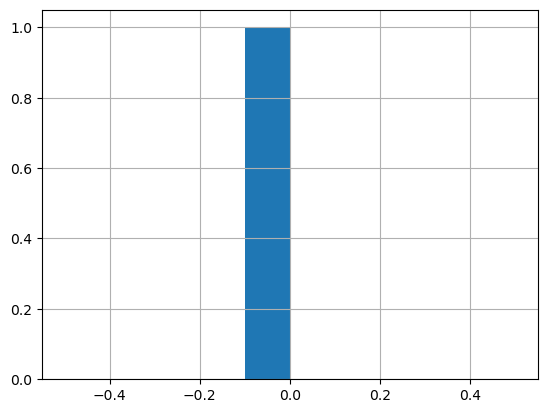

In [16]:
delta["Percent diff"].hist()

In [17]:
pls = delta.index[-1]
print("WORST PERLND SEGMENT IS", pls)

WORST PERLND SEGMENT IS 001


#### PERLND PWATER AGWO

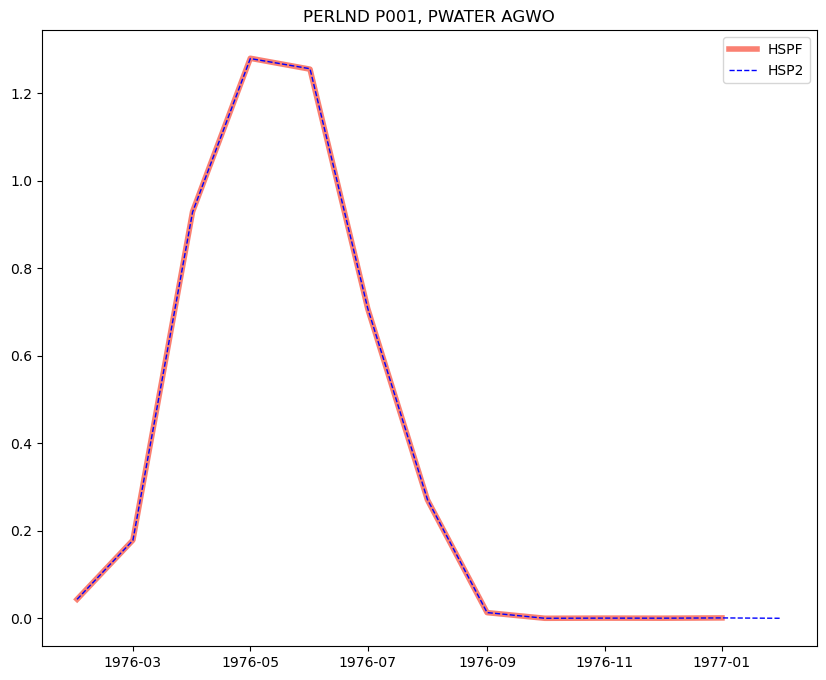

In [18]:
plot("PERLND", pls, "PWATER", "AGWO", "sum")

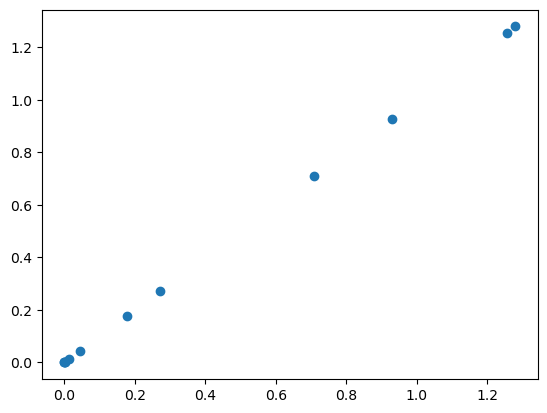

In [19]:
scatter("PERLND", pls, "PWATER", "AGWO", "sum")

#### PERLND PWATER BASET

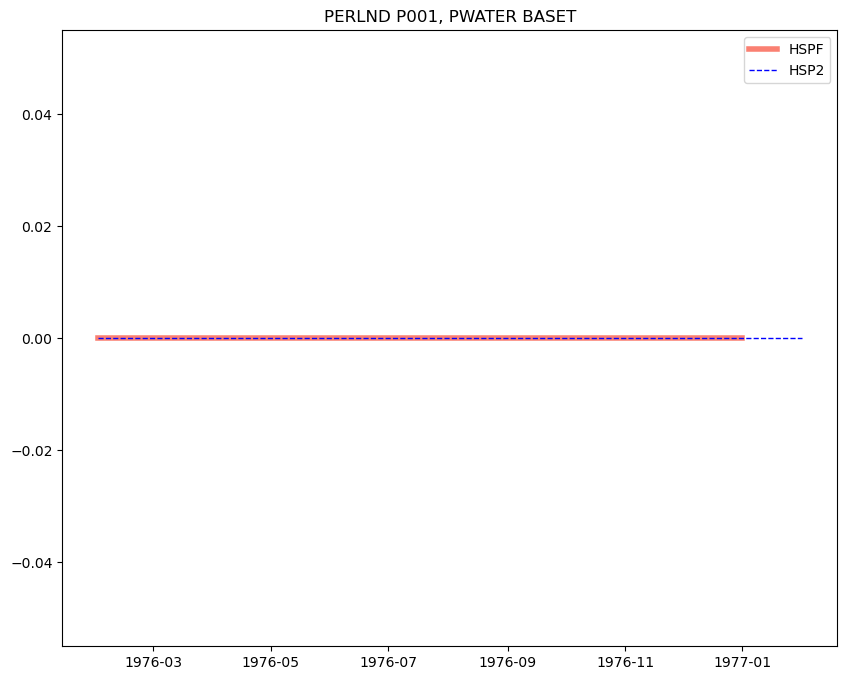

In [20]:
plot("PERLND", pls, "PWATER", "BASET", "sum")

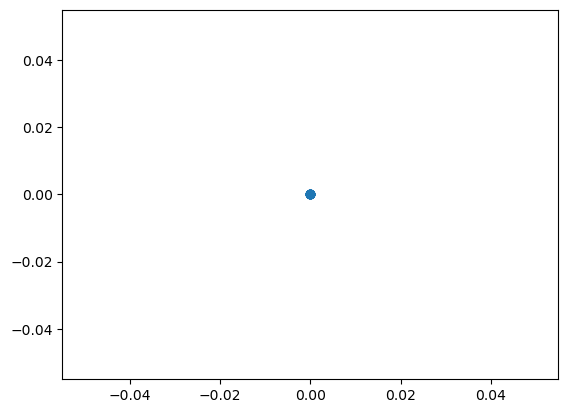

In [21]:
scatter("PERLND", pls, "PWATER", "BASET", "sum")

##### PERLND PWATER CEPE

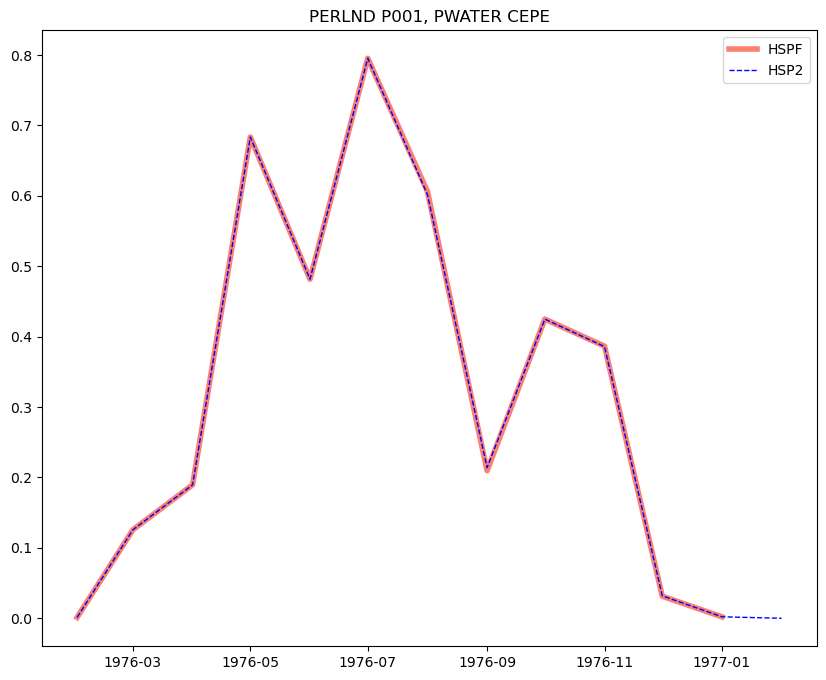

In [22]:
plot("PERLND", pls, "PWATER", "CEPE", "sum")

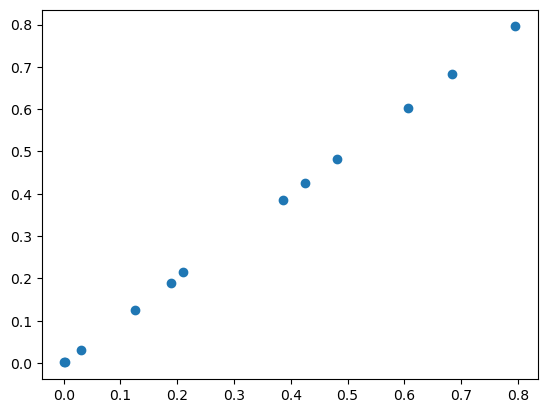

In [23]:
scatter("PERLND", pls, "PWATER", "CEPE", "sum")

#### PERLND PWATER IFWI

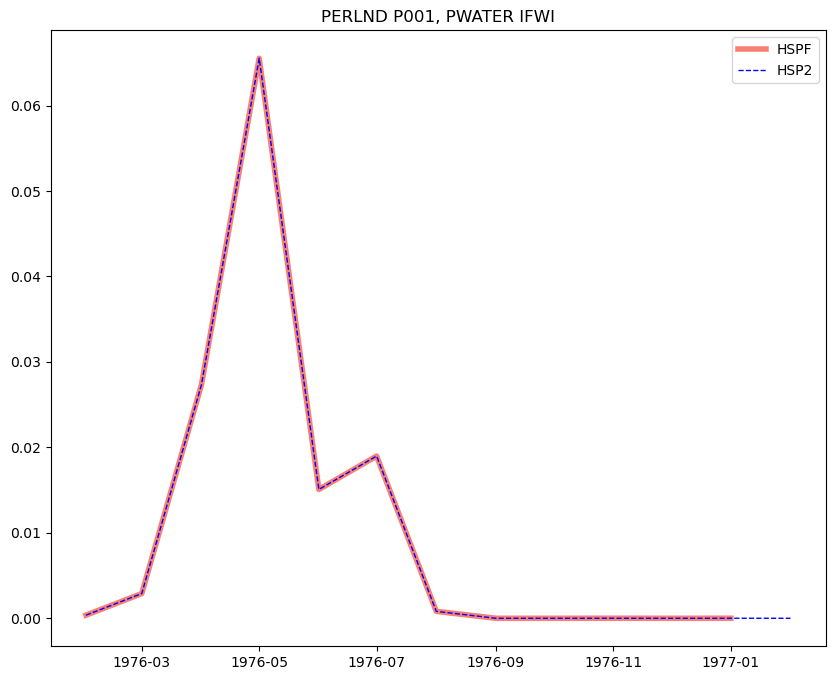

In [24]:
plot("PERLND", pls, "PWATER", "IFWI", "sum")

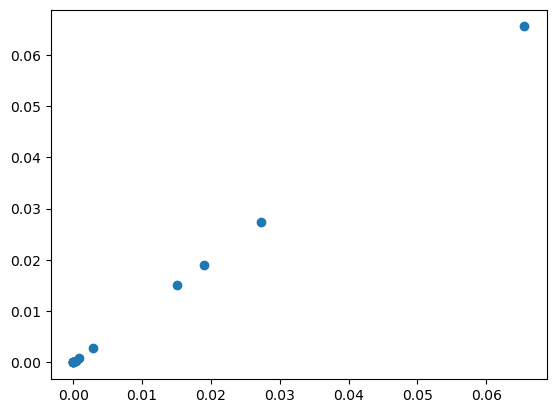

In [25]:
scatter("PERLND", pls, "PWATER", "IFWI", "sum")

#### PERLND PWATER IFWO

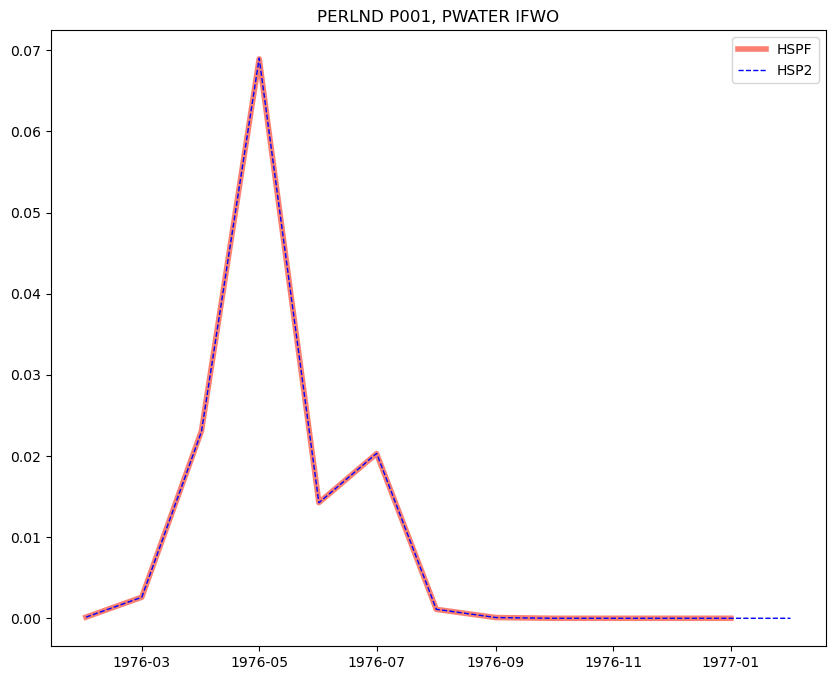

In [26]:
plot("PERLND", pls, "PWATER", "IFWO", "sum")

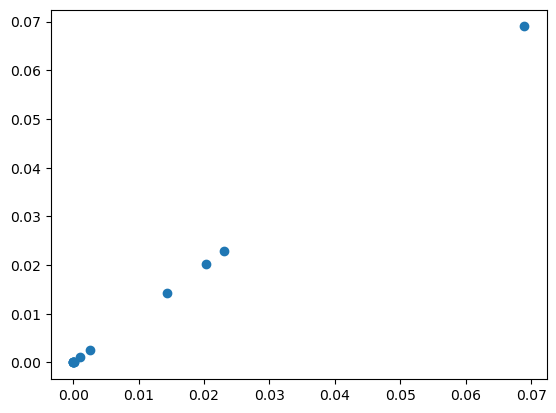

In [27]:
scatter("PERLND", pls, "PWATER", "IFWO", "sum")

#### PERLND PWATER IGWI

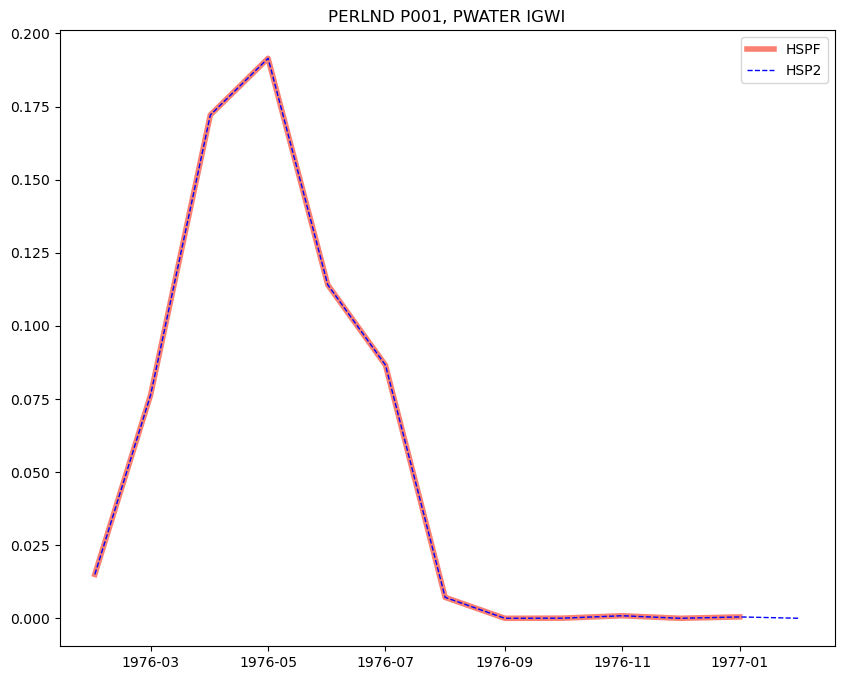

In [28]:
plot("PERLND", pls, "PWATER", "IGWI", "sum")

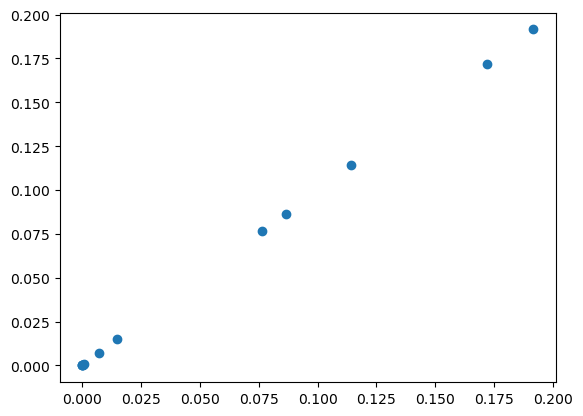

In [29]:
scatter("PERLND", pls, "PWATER", "IGWI", "sum")

#### PERLND PWATER INFIL

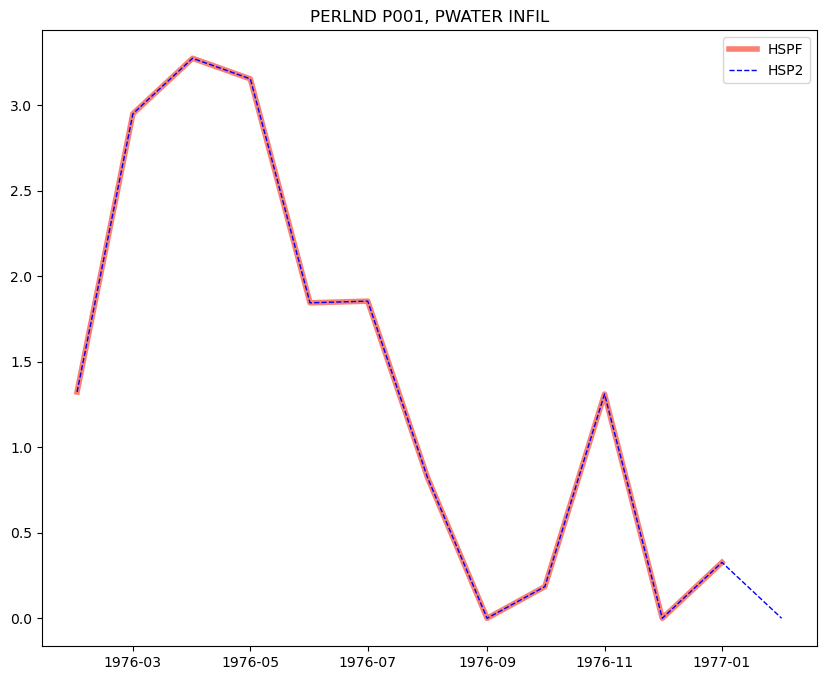

In [30]:
plot("PERLND", pls, "PWATER", "INFIL", "sum")

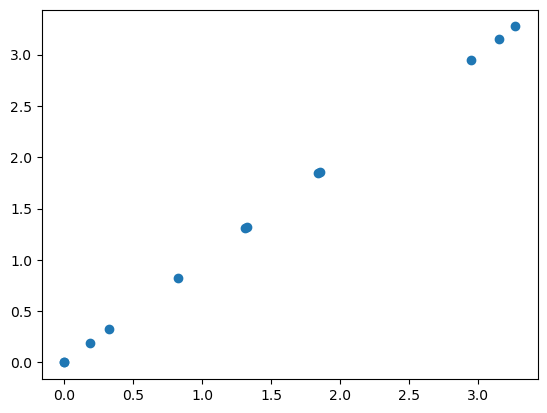

In [31]:
scatter("PERLND", pls, "PWATER", "INFIL", "sum")

#### PERLND PWATER LZET

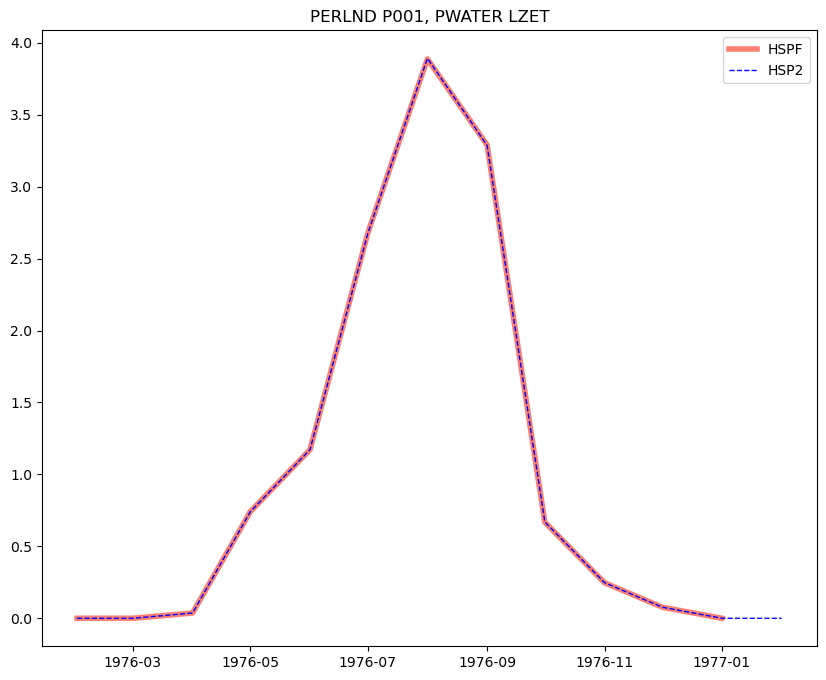

In [32]:
plot("PERLND", pls, "PWATER", "LZET", "sum")

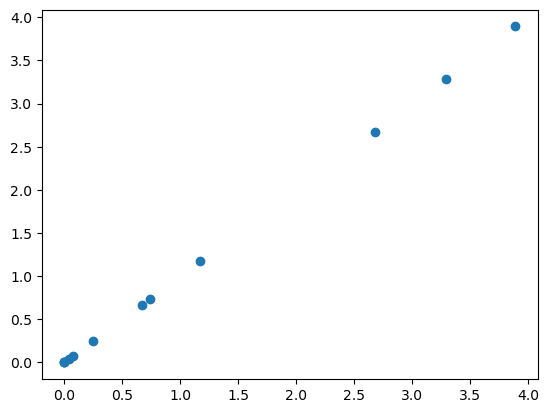

In [33]:
scatter("PERLND", pls, "PWATER", "LZET", "sum")

#### PERLND PWATER PERC

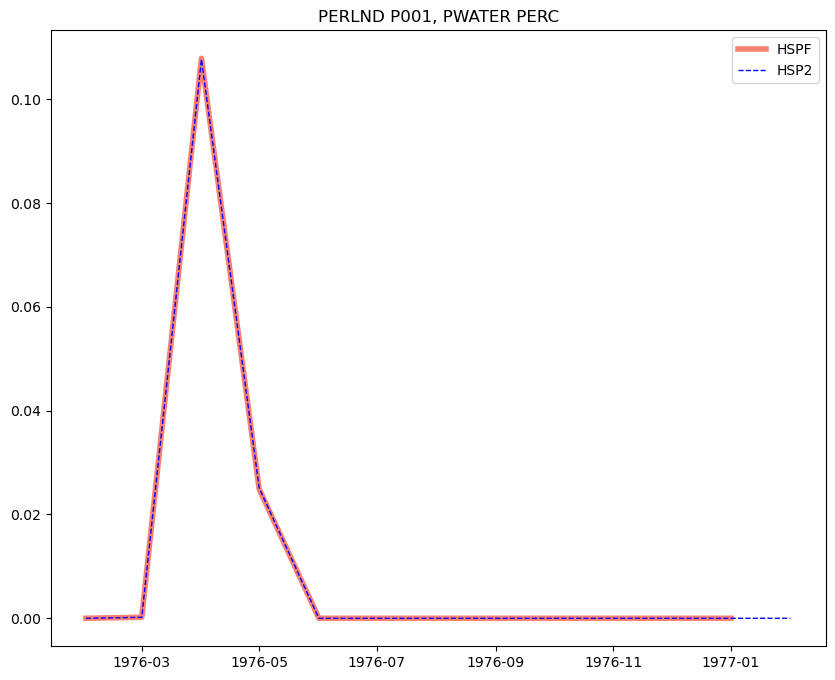

In [34]:
plot("PERLND", pls, "PWATER", "PERC", "sum")

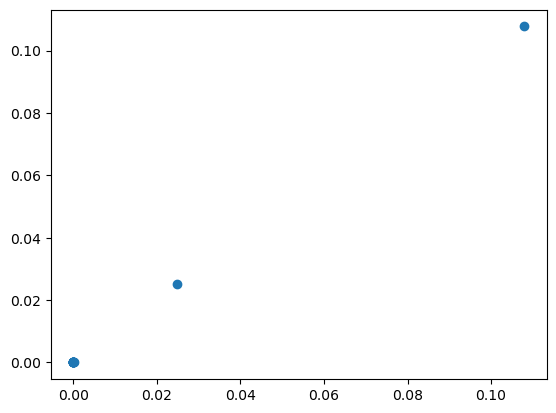

In [35]:
scatter("PERLND", pls, "PWATER", "PERC", "sum")

#### PERLND PWATER PERO

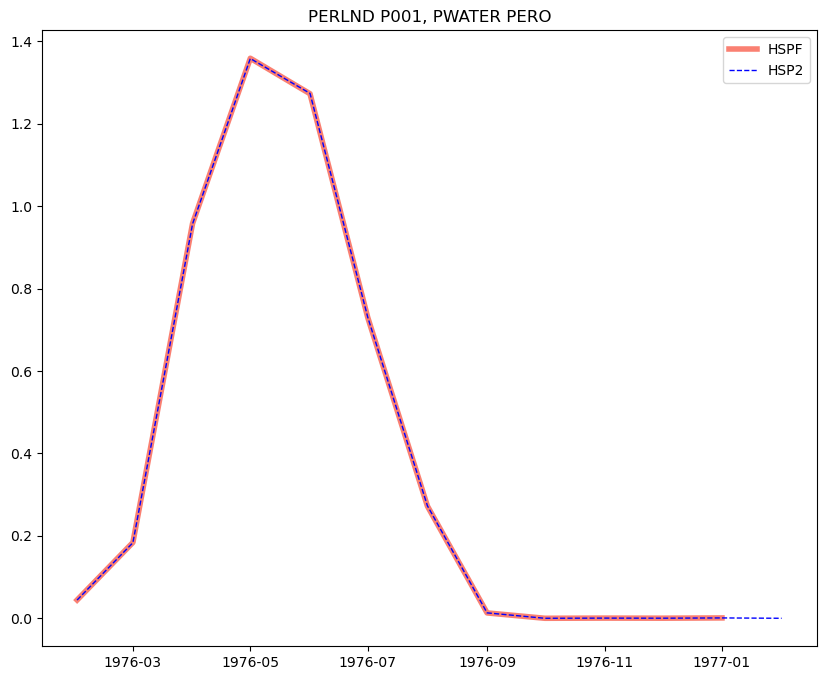

In [36]:
plot("PERLND", pls, "PWATER", "PERO", "sum")

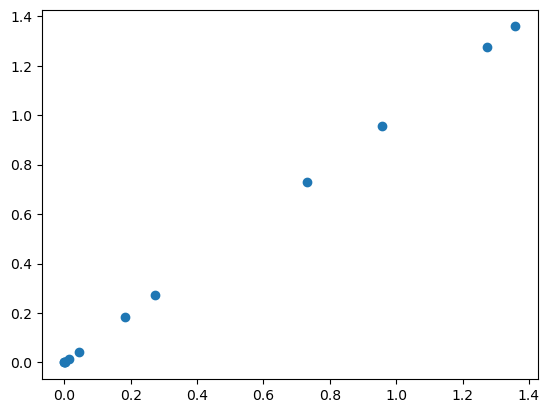

In [37]:
scatter("PERLND", pls, "PWATER", "PERO", "sum")

#### PERLND PWATER PERS

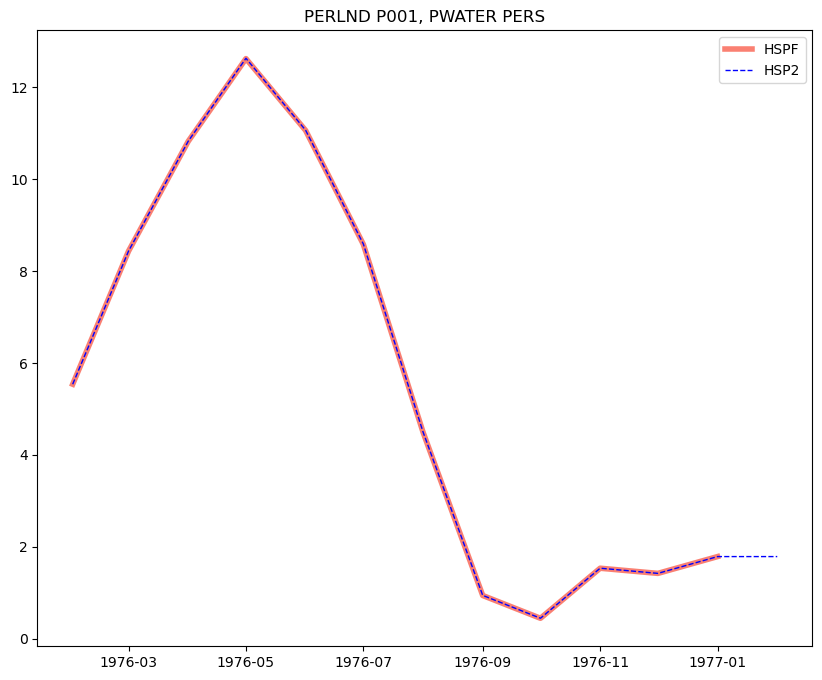

In [38]:
plot("PERLND", pls, "PWATER", "PERS", "last")

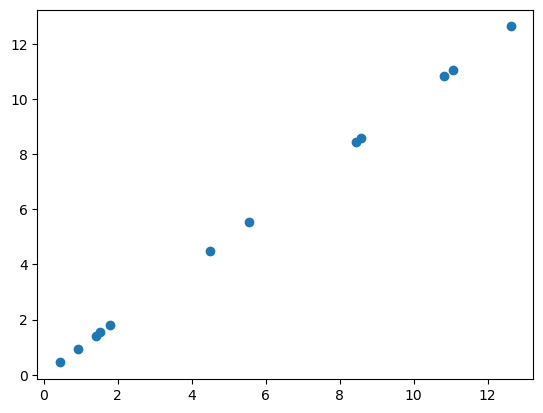

In [39]:
scatter("PERLND", pls, "PWATER", "PERS", "last")

#### PERLND PWATER PET, Monthly

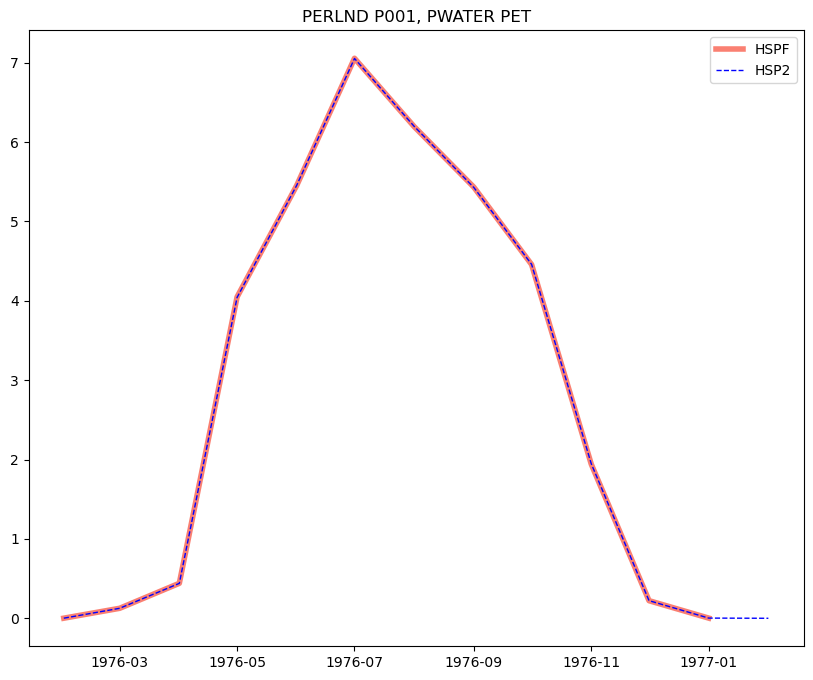

In [40]:
plot("PERLND", pls, "PWATER", "PET", "sum")

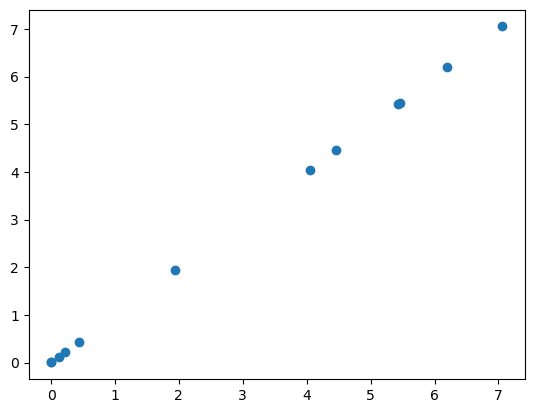

In [41]:
scatter("PERLND", pls, "PWATER", "PET", "sum")

#### PERLND PWATER SUPY

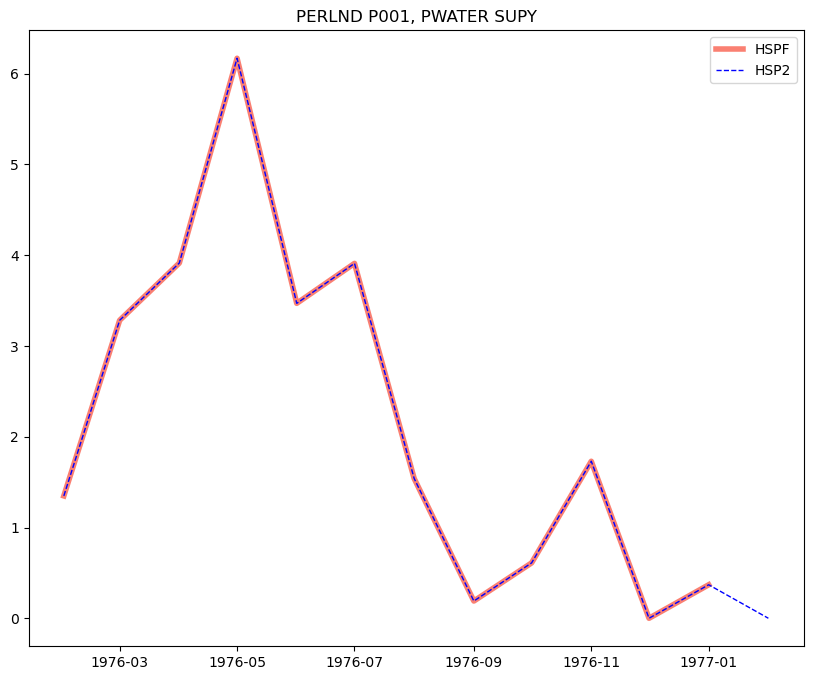

In [42]:
plot("PERLND", pls, "PWATER", "SUPY", "sum")

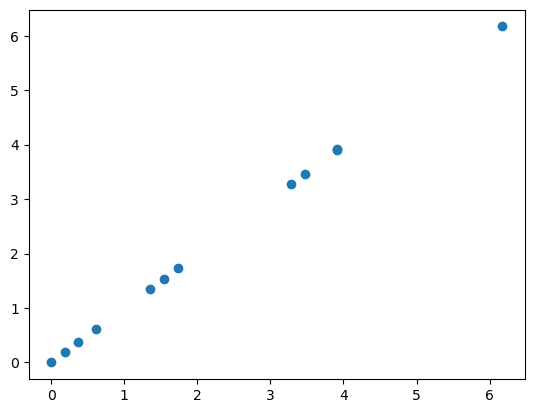

In [43]:
scatter("PERLND", pls, "PWATER", "SUPY", "sum")

#### PERLND PWATER SURO

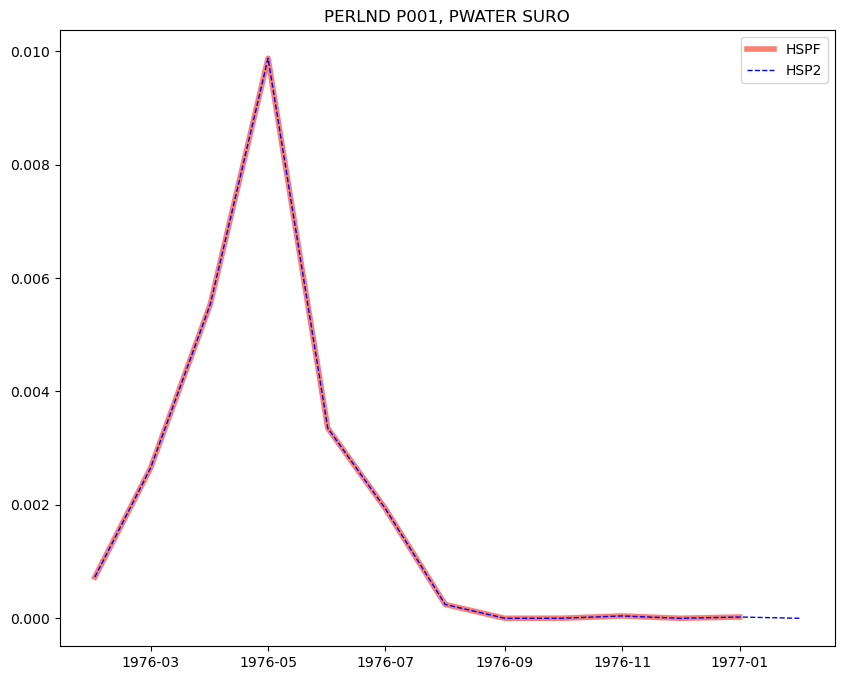

In [44]:
plot("PERLND", pls, "PWATER", "SURO", "sum")

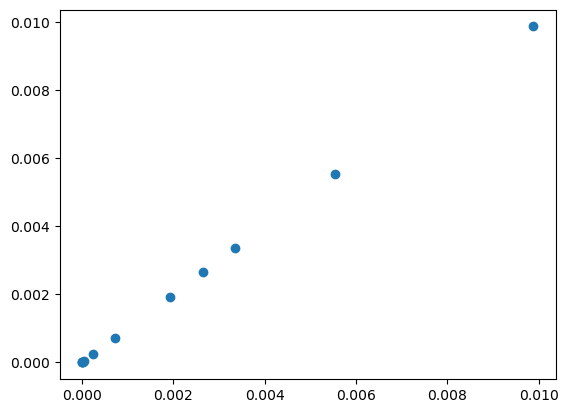

In [45]:
scatter("PERLND", pls, "PWATER", "SURO", "sum")

#### PERLND PWATER TAET

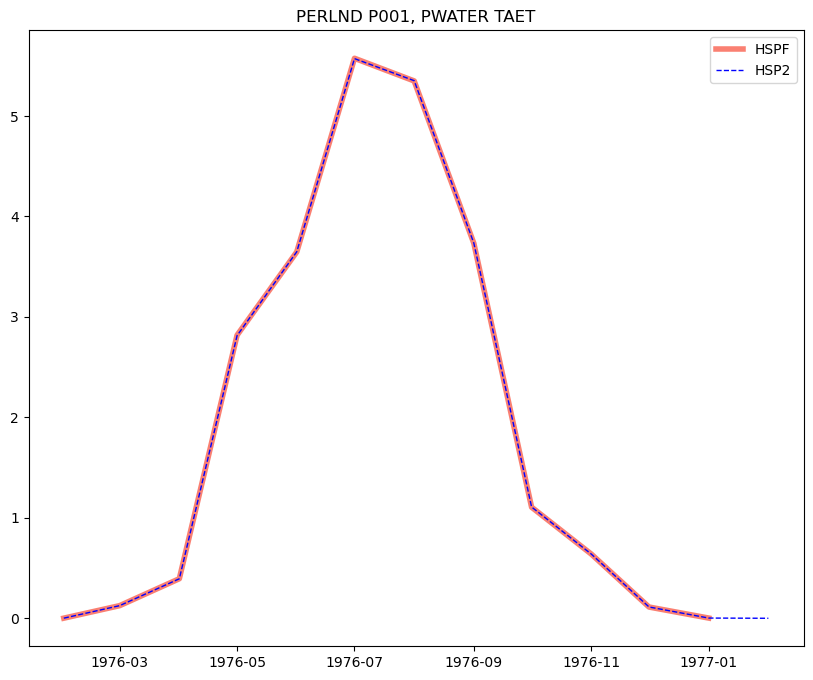

In [46]:
plot("PERLND", pls, "PWATER", "TAET", "sum")

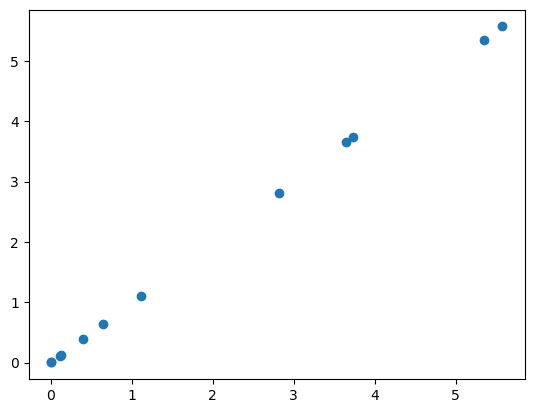

In [47]:
scatter("PERLND", pls, "PWATER", "TAET", "sum")

#### PERLND PWATER UZET

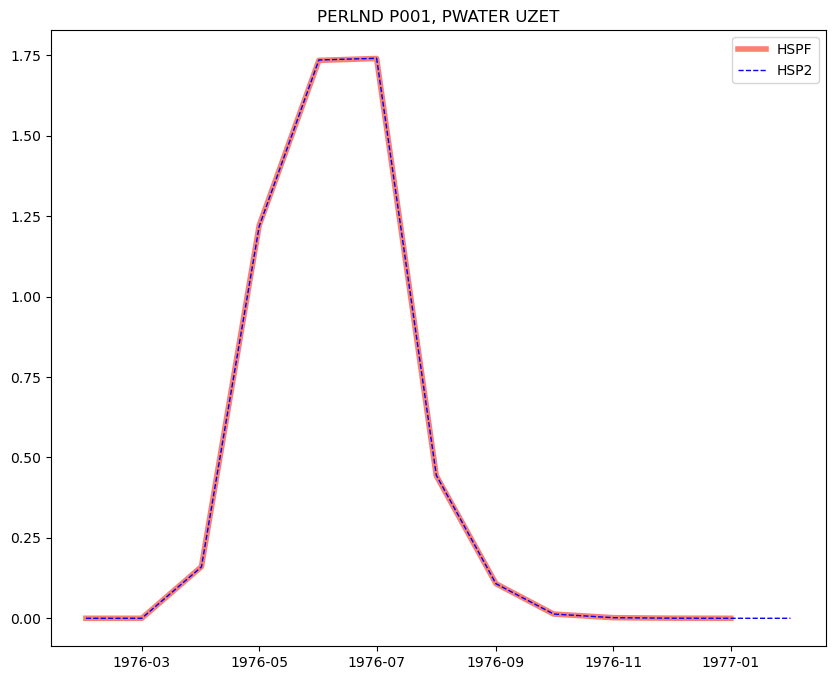

In [48]:
plot("PERLND", pls, "PWATER", "UZET", "sum")

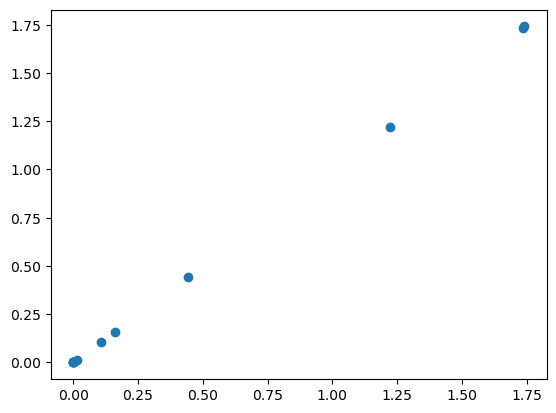

In [49]:
scatter("PERLND", pls, "PWATER", "UZET", "sum")

#### PERLND PWATER UZI

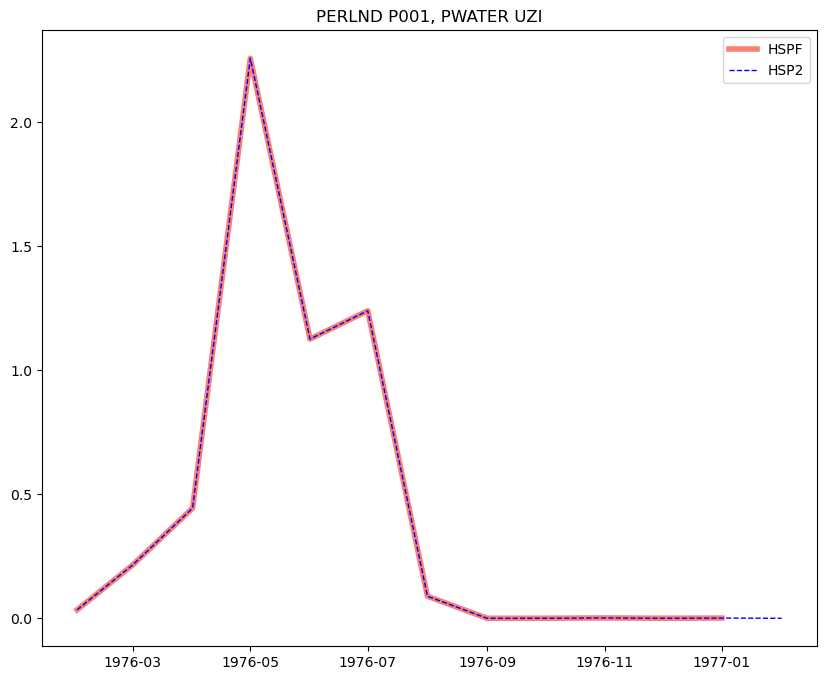

In [50]:
plot("PERLND", pls, "PWATER", "UZI", "sum")

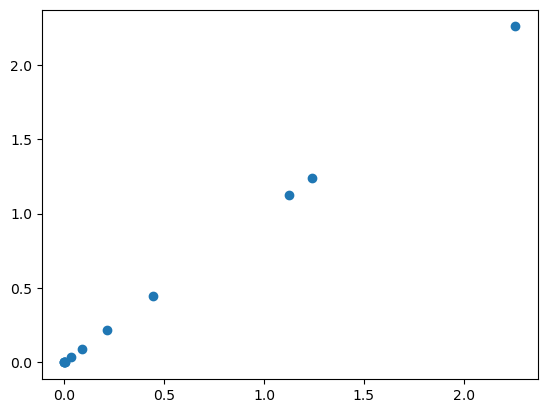

In [51]:
scatter("PERLND", pls, "PWATER", "UZI", "sum")

## RCHRES

In [52]:
rchreskeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "RCHRES")]
rchreskeys[0:10]

,Operation,Activity,segment,Frequency,Shape,Start,Stop
RCHRES_HYDR_001_4,RCHRES,HYDR,1,Monthly,"(12, 19)",1976-02-01,1977-01-01
RCHRES_HYDR_002_4,RCHRES,HYDR,2,Monthly,"(12, 14)",1976-02-01,1977-01-01
RCHRES_HYDR_003_4,RCHRES,HYDR,3,Monthly,"(12, 14)",1976-02-01,1977-01-01
RCHRES_HYDR_004_4,RCHRES,HYDR,4,Monthly,"(12, 14)",1976-02-01,1977-01-01


In [53]:
delta = monthlyoutflow(rchreskeys, "ROVOL")
delta

,HSP2_SUM,HSPF_SUM,Percent diff,abs(Percent diff)
002,2155.4131,2155.4074,-0.0003,0.0003
004,2410.2026,2410.1933,-0.0004,0.0004
001,2410.2026,2410.1931,-0.0004,0.0004
003,254.7893,254.7856,-0.0015,0.0015


Look at the statistics for the percent difference column

In [54]:
delta.describe()

,HSP2_SUM,HSPF_SUM,Percent diff,abs(Percent diff)
count,4.0000,4.0000,4.0000,4.0000
mean,1807.6520,1807.6449,-0.0006,0.0006
std,1042.1860,1042.1835,0.0006,0.0006
min,254.7893,254.7856,-0.0015,0.0003
25%,1680.2571,1680.2520,-0.0007,0.0004
50%,2282.8079,2282.8003,-0.0004,0.0004
75%,2410.2026,2410.1932,-0.0004,0.0007
max,2410.2026,2410.1933,-0.0003,0.0015


<Axes: >

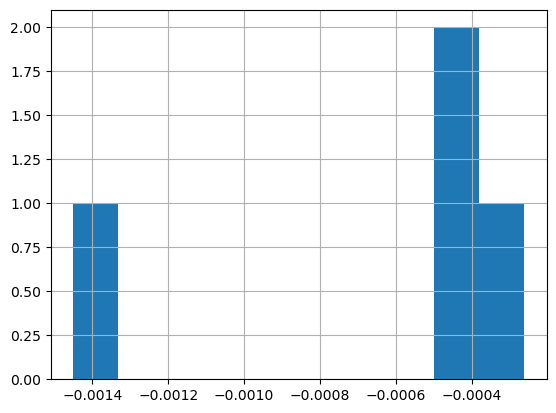

In [55]:
delta["Percent diff"].hist()

In [56]:
rid = delta.index[-1]
print("WORST RCHRES SEGMENT IS", rid)

WORST RCHRES SEGMENT IS 003


#### RCHRES HYDR IVOL

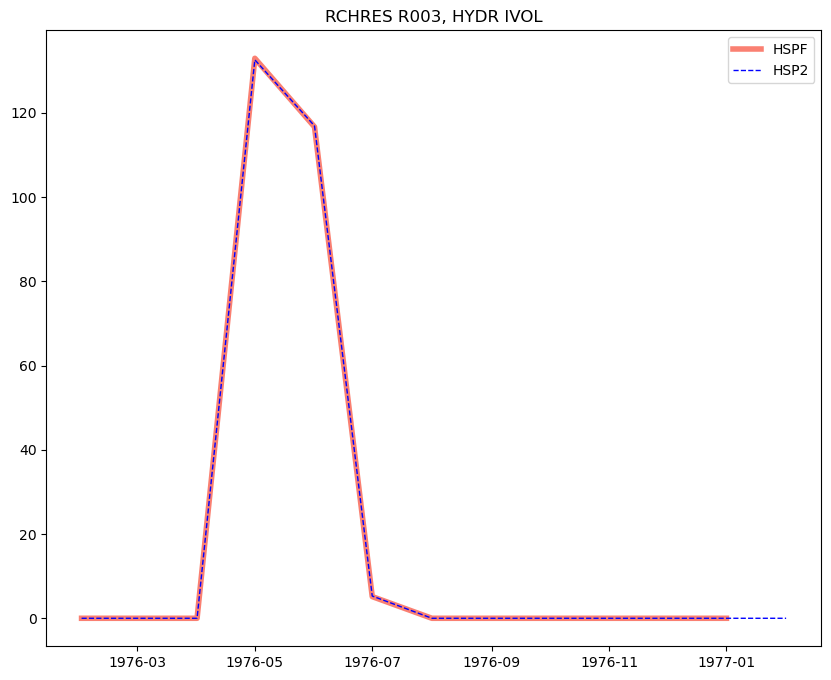

In [57]:
plot("RCHRES", rid, "HYDR", "IVOL", "sum")

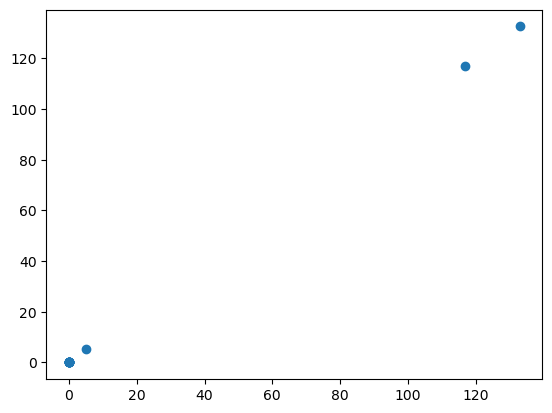

In [58]:
scatter("RCHRES", rid, "HYDR", "IVOL", "sum")

#### RCHRES HYDR PRSUPY

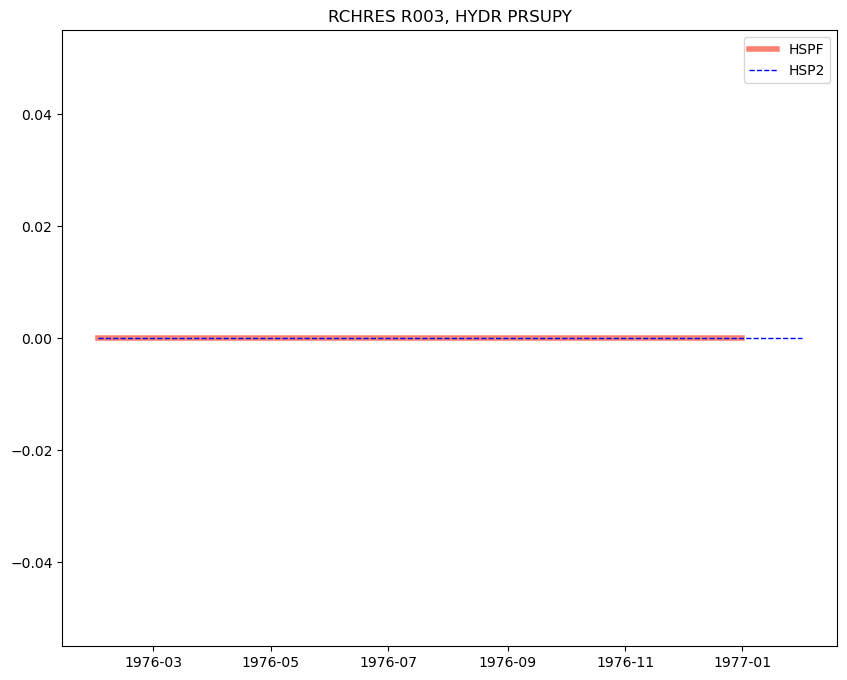

In [59]:
plot("RCHRES", rid, "HYDR", "PRSUPY", "sum")

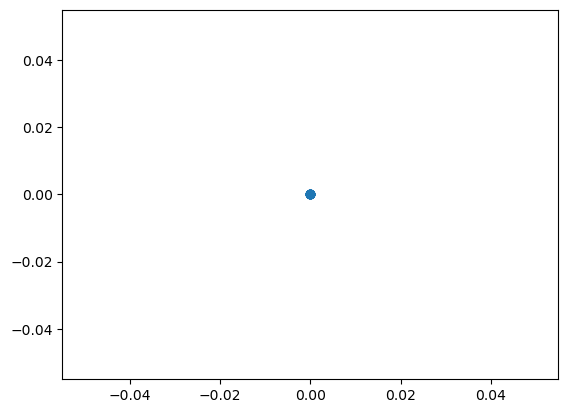

In [60]:
scatter("RCHRES", rid, "HYDR", "PRSUPY", "sum")

#### RCHRES HYDR ROVOL

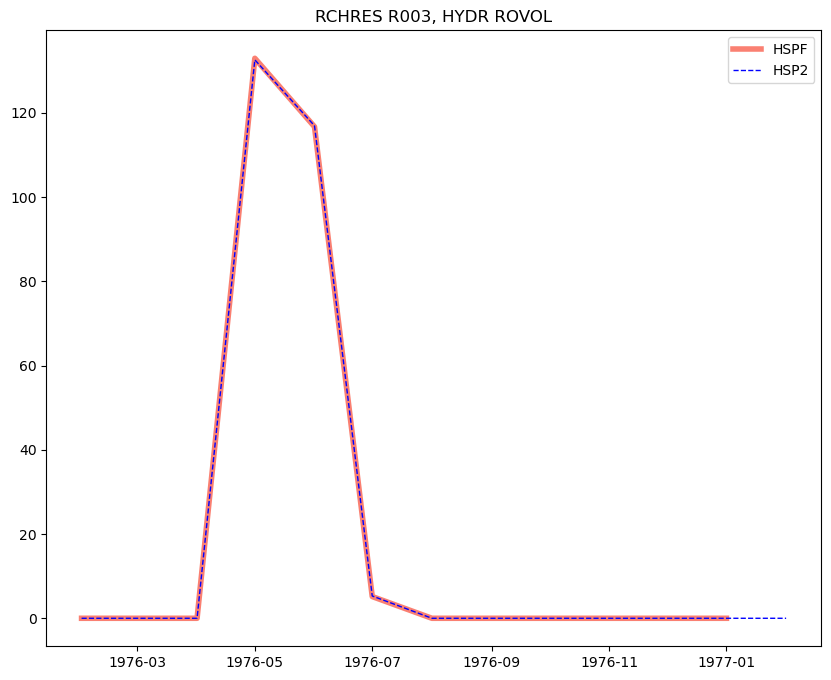

In [61]:
plot("RCHRES", rid, "HYDR", "ROVOL", "sum")

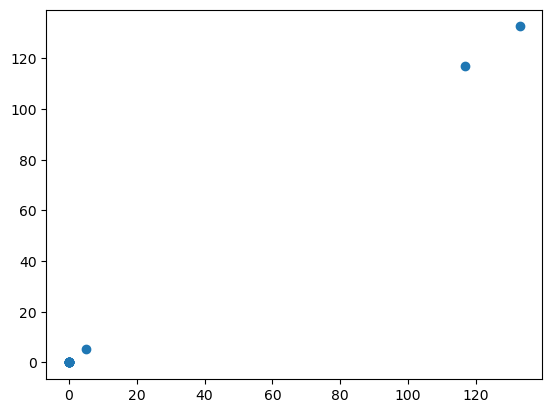

In [62]:
scatter("RCHRES", rid, "HYDR", "ROVOL", "sum")

#### RCHRES HYDR VOL

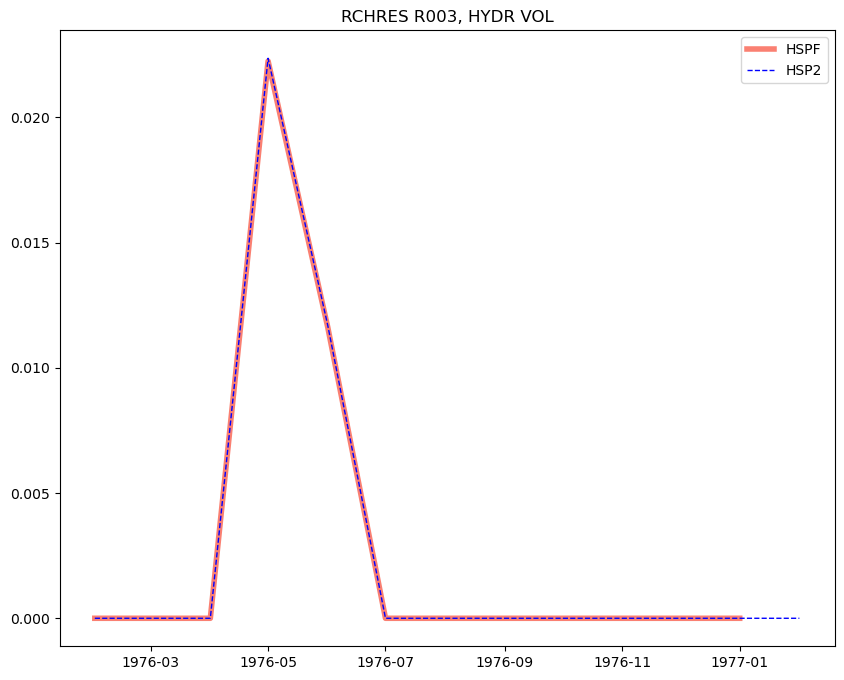

In [63]:
plot("RCHRES", rid, "HYDR", "VOL", "last")

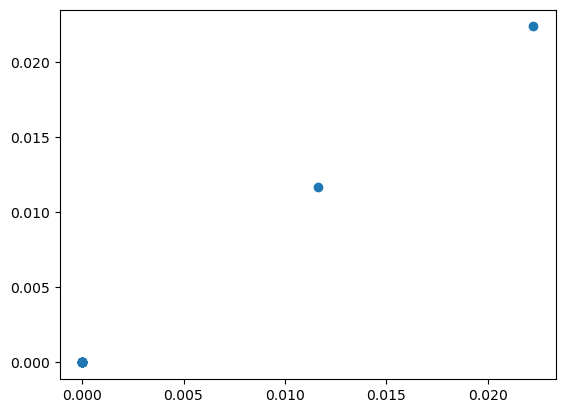

In [64]:
scatter("RCHRES", rid, "HYDR", "VOL", "last")

#### RCHRES HYDR VOLEV

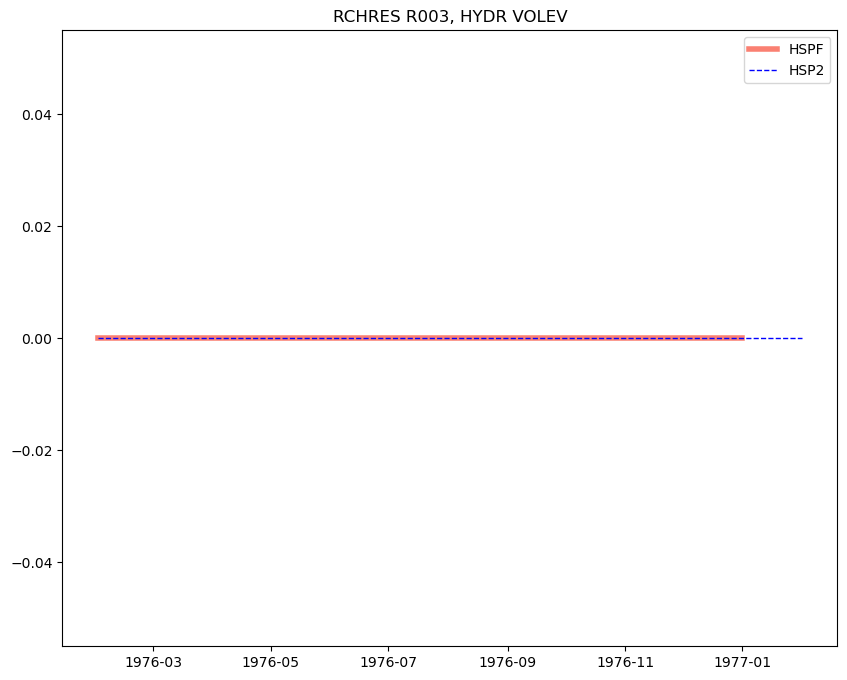

In [65]:
plot("RCHRES", rid, "HYDR", "VOLEV", "sum")

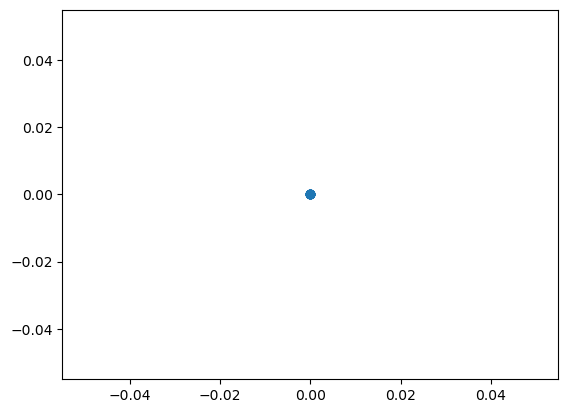

In [66]:
scatter("RCHRES", rid, "HYDR", "VOLEV", "sum")